#Exploración de datos

Como primera etapa del proyecto, El objetivo principal de esta entrega es, realizar una exploración general y descriptiva de los datos.

## Carga de dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
!mkdir /root/.config/kaggle
!mv kaggle.json /root/.config/kaggle/kaggle.json

In [3]:
!chmod 600 /root/.config/kaggle/kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia
!unzip udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip

Archive:  udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


## Exploración general del dataset

### Identificación de columnas

In [4]:
d = pd.read_csv("train.csv")
print(d.shape)
d.columns

(692500, 21)


Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD',
       'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL',
       'coef_1', 'coef_2', 'coef_3', 'coef_4'],
      dtype='object')

Mediante la libreria de pandas podemos cargar el dataset a un objeto de tipo dataframe. Obtenemos la lista de las diferentes columnas mediante la propiedad columns. En la descripción general de la competencia en Kaggle se tienen las siguientes categorías para los datos

1. Información socieconómica: En esta podemos agrupar las siguientes propiedades o columnas del dataset:

* FAMI_ESTRATOVIVIENDA
* FAMI_TIENEINTERNET
* FAMI_EDUCACIONPADRE
* FAMI_EDUCACIONMADRE
* FAMI_TIENELAVADORA
* FAMI_TIENEAUTOMOVIL
* FAMI_TIENECOMPUTADOR
* FAMI_TIENEINTERNET.1 (Repetida)

2. Información de instituciones: Información de las instituciones que agrupa las siguientes columnas

* ESTU_PRGM_DEPARTAMENTO
* ESTU_VALORMATRICULAUNIVERSIDAD

3. Información del estudiante: Para esta categoría se pueden agrupar las siguientes columnas

* ID
* PERIODO
* ESTU_PRGM_ACADEMICO
* ESTU_HORASSEMANATRABAJA
* ESTU_PRIVADO_LIBERTAD
* ESTU_PAGOMATRICULAPROPIO

4. Información estadística: Coeficientes desarrollados por equipos de estudio:

* coef_1
* coef_2
* coef_3
* coef_4

#### Algunos datos iniciales

In [5]:
d.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


#### Registros vacios

Para los posteriores análisis es importante determinar si existen registros vacíos para algunas de las categorías y que porcentajes pueden representar

In [6]:
for i in d.columns:
    null_registers = np.sum(d[i].isna())
    total = d.shape[0]
    percentage = np.round(100*null_registers/total,2)
    print ("%30s"%i, null_registers, "%20s" %'de un total de: ', total,
                   "20s. Representa un porcentaje de: %.2f%%" %percentage)

                            ID 0     de un total de:  692500 20s. Representa un porcentaje de: 0.00%
                       PERIODO 0     de un total de:  692500 20s. Representa un porcentaje de: 0.00%
           ESTU_PRGM_ACADEMICO 0     de un total de:  692500 20s. Representa un porcentaje de: 0.00%
        ESTU_PRGM_DEPARTAMENTO 0     de un total de:  692500 20s. Representa un porcentaje de: 0.00%
ESTU_VALORMATRICULAUNIVERSIDAD 6287     de un total de:  692500 20s. Representa un porcentaje de: 0.91%
       ESTU_HORASSEMANATRABAJA 30857     de un total de:  692500 20s. Representa un porcentaje de: 4.46%
          FAMI_ESTRATOVIVIENDA 32137     de un total de:  692500 20s. Representa un porcentaje de: 4.64%
            FAMI_TIENEINTERNET 26629     de un total de:  692500 20s. Representa un porcentaje de: 3.85%
           FAMI_EDUCACIONPADRE 23178     de un total de:  692500 20s. Representa un porcentaje de: 3.35%
            FAMI_TIENELAVADORA 39773     de un total de:  692500 20s. Re

La columna con mayor número de datos faltantes, es la correspondiente a la cualidad de tenencia, o no tenencia de un automóvil por parte de la familia del estudiante. A pesar de que se tienen un total de 43,623 registros vacios, estos solo representan un 6.30% del total de la muestra. Como es de esperar, las dos columnas relacionadas a la tenencia de internet arrojan el mismo total de valores vacíos, lo cual indica que efectivamente son los mismos datos. Podemos utilizar las funciones de numpy para comprobarlo

In [7]:
d[['FAMI_TIENEINTERNET', 'FAMI_TIENEINTERNET.1']]

,FAMI_TIENEINTERNET,FAMI_TIENEINTERNET.1
0,Si,Si
1,No,No
2,Si,Si
3,Si,Si
4,Si,Si
...,...,...
692495,Si,Si
692496,Si,Si
692497,Si,Si
692498,No,No


In [8]:
new_d = d.copy()
# Excluimos primero los valores nulos de cada columna
new_d = new_d.loc[~(d['FAMI_TIENEINTERNET'].isna() | d['FAMI_TIENEINTERNET.1'].isna())]
dist_values = np.sum(new_d['FAMI_TIENEINTERNET'] != new_d['FAMI_TIENEINTERNET.1'])
print("Total registros distintos: ", dist_values)

Total registros distintos:  0


Al no tener en cuenta los registros vacíos vemos que no existen diferencias en los valores de las dos columnas

In [9]:
new_d[['FAMI_TIENEINTERNET', 'FAMI_TIENEINTERNET.1']]

,FAMI_TIENEINTERNET,FAMI_TIENEINTERNET.1
0,Si,Si
1,No,No
2,Si,Si
3,Si,Si
4,Si,Si
...,...,...
692495,Si,Si
692496,Si,Si
692497,Si,Si
692498,No,No


### Conociendo la "población"

Estudiamos ahora como se distribuyen los datos en diferentes aspectos relacionados a las diferentes categorías, esto permitirá hacerse una idea general de las caracteristicas generales de la población

#### Distrbiución de programas

¿Cuáles son los programas que más se estudian en Colombia?

In [10]:
new_d = d.copy()
new_d['ESTU_PRGM_ACADEMICO'].value_counts()

,count
ESTU_PRGM_ACADEMICO,
DERECHO,53244
ADMINISTRACION DE EMPRESAS,51902
CONTADURIA PUBLICA,39664
PSICOLOGIA,31932
INGENIERIA INDUSTRIAL,28481
...,...
DEPORTE Y ACTIVIDADA FISICA,1
QUIMICA Y FARMACIA,1
"LICENCIATURA EN EDUCACON FISICA, RECREACION Y DEPORTES",1


#### Distribución regional

¿Qué departamentos tienen el mayor número de estudiantes de educación superior?

In [11]:
new_d['ESTU_PRGM_DEPARTAMENTO'].value_counts()

,count
ESTU_PRGM_DEPARTAMENTO,
BOGOTÁ,282159
ANTIOQUIA,83607
VALLE,44588
ATLANTICO,41020
SANTANDER,28828
NORTE SANTANDER,22588
BOLIVAR,20629
BOYACA,14048
CUNDINAMARCA,14018


#### Estrato Socioeconomico

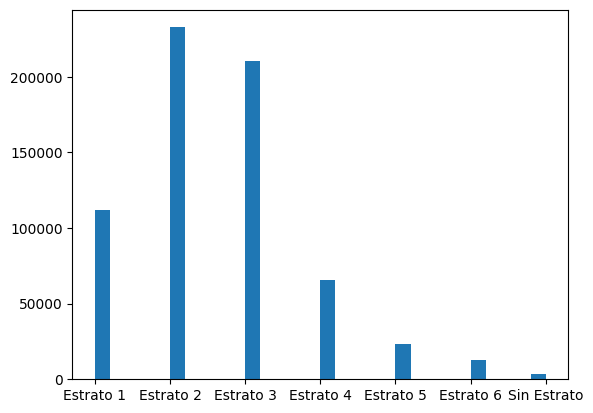

In [12]:
plt.hist(new_d.FAMI_ESTRATOVIVIENDA.dropna().sort_values().values, bins=30)
plt.show()

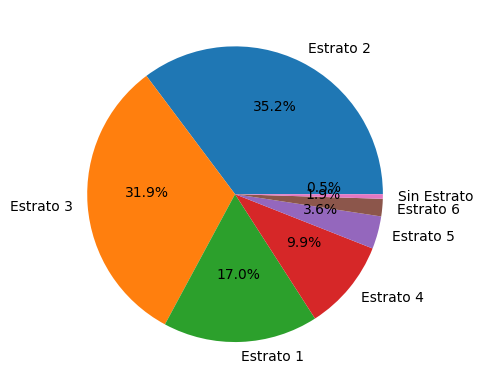

In [13]:
x = new_d.FAMI_ESTRATOVIVIENDA.dropna().value_counts().values
labels = new_d.FAMI_ESTRATOVIVIENDA.dropna().value_counts().index.values

def func(pct):
  return f"{pct:.1f}%\n"

plt.pie(x=x, labels=labels, autopct=lambda pct: func(pct))
plt.show()

La mayoría de los estudiantes pertenecen a los estratos 1 a 3 y conforman un total del 84.1% de los registros no vacíos en esta columna.

## Exploración con datos agrupados

Un examen más profundo de los datos involucra siempre un agrupamiento de datos que permitan visualizar tendencias, como por ejemplo, la distribución de programas en cada región, que no solo muestran una preferencia de los estudiantes sino también reflejan la calidad de la oferta en cada zona.

###Recursos familiares

Teniendo en cuenta que la mayoría de los estudiantes pertenecen a los estratos 1 a 3, se busca explorar el acceso a diferentes recursos que se tienen en esta porción de la población.

In [14]:
new_d = d.copy()
new_d.FAMI_ESTRATOVIVIENDA.dropna()
new_d = new_d.loc[(new_d['FAMI_ESTRATOVIVIENDA']=='Estrato 1') |
                  (new_d['FAMI_ESTRATOVIVIENDA']=='Estrato 2') |
                  (new_d['FAMI_ESTRATOVIVIENDA']=='Estrato 3')]

new_d = new_d.loc[:, ['FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET','FAMI_TIENELAVADORA','FAMI_TIENEAUTOMOVIL',
                           'FAMI_TIENECOMPUTADOR']]

new_d

,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR
0,Estrato 3,Si,Si,Si,Si
1,Estrato 3,No,Si,No,Si
2,Estrato 3,Si,Si,No,No
4,Estrato 3,Si,Si,Si,Si
6,Estrato 2,Si,Si,Si,Si
...,...,...,...,...,...
692494,Estrato 3,Si,Si,Si,Si
692495,Estrato 2,Si,Si,No,Si
692496,Estrato 3,Si,Si,No,Si
692497,Estrato 3,Si,Si,No,Si


In [17]:
# Conteos
have_resources = np.zeros((3,4))
no_have_resources = np.zeros((3,4))

resources = ['FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA','FAMI_TIENEAUTOMOVIL','FAMI_TIENECOMPUTADOR']
resources_labels = ['Internet', 'Lavadora','Automovil','Computador']

for i in range(1,4):
  for j in range(4):
    resource = resources[j]

    have_resources[i-1,j] = float(new_d.loc[(new_d['FAMI_ESTRATOVIVIENDA'] == ('Estrato '+str(i)))
                            & (new_d[resource]=='Si'), [resource]].value_counts())

    no_have_resources[i-1,j] = float(new_d.loc[(new_d['FAMI_ESTRATOVIVIENDA'] == ('Estrato '+str(i)))
                            & (new_d[resource]=='No'), [resource]].value_counts())


<ipython-input-17-4059029f60d4>:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  have_resources[i-1,j] = float(new_d.loc[(new_d['FAMI_ESTRATOVIVIENDA'] == ('Estrato '+str(i)))
<ipython-input-17-4059029f60d4>:15: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  no_have_resources[i-1,j] = float(new_d.loc[(new_d['FAMI_ESTRATOVIVIENDA'] == ('Estrato '+str(i)))
<ipython-input-17-4059029f60d4>:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  have_resources[i-1,j] = float(new_d.loc[(new_d['FAMI_ESTRATOVIVIENDA'] == ('Estrato '+str(i)))
<ipython-input-17-4059029f60d4>:15: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]

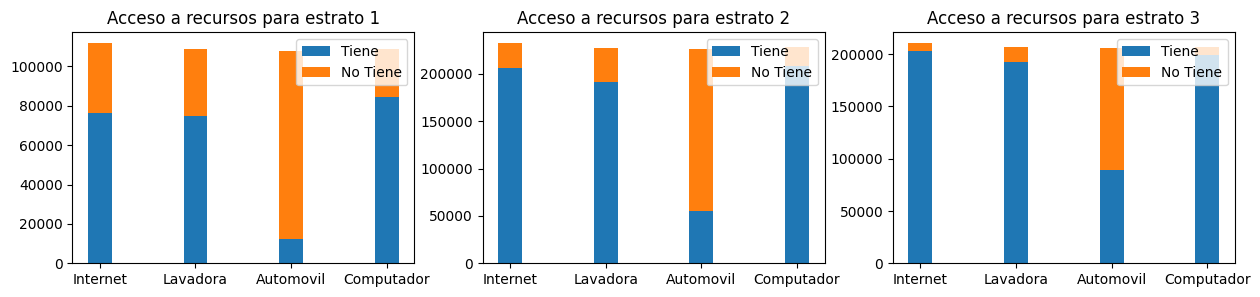

In [18]:
# Plotting
plt.figure(figsize=(15,3))
for i in range(3):
    bottom = np.zeros(4)
    ax = plt.subplot(1,3,i+1)
    p = ax.bar(resources_labels, have_resources[i,:], 0.25, label='Tiene', bottom=bottom)
    bottom += have_resources[i,:]
    p = ax.bar(resources_labels, no_have_resources[i,:], 0.25, label='No Tiene', bottom=bottom)
    ax.set_title("Acceso a recursos para estrato "+str(i+1))
    ax.legend(loc="upper right")

plt.show()

Podemos considerar que el acceso a un computador e internet es una variable de gran impacto para un buen desempeño académico. Vemos que existe una gran población de estrato uno que no tienen acceso a internet y/o un computador (Alrededor de un 20%). Como es de esperar, la tenencia de recursos se incrementa con el estrato socioeconomico.

###Educación padres

In [19]:
new_d = d.copy()

print(new_d['FAMI_EDUCACIONPADRE'].nunique())
print(new_d['FAMI_EDUCACIONMADRE'].nunique())

new_d.loc[~(new_d.FAMI_EDUCACIONPADRE.isna() | new_d.FAMI_EDUCACIONMADRE.isna()),
          ['FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE']]

12
12


,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE
0,Técnica o tecnológica incompleta,Postgrado
1,Técnica o tecnológica completa,Técnica o tecnológica incompleta
2,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa
3,No sabe,Secundaria (Bachillerato) completa
4,Primaria completa,Primaria completa
...,...,...
692495,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta
692496,Primaria incompleta,Secundaria (Bachillerato) incompleta
692497,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta
692498,Primaria completa,Primaria completa


In [20]:
conteo = new_d.loc[new_d['FAMI_ESTRATOVIVIENDA'] == 'Estrato 1',
                        ['FAMI_EDUCACIONPADRE']].value_counts()

labels = conteo.axes
new_labels = []
for i in range(len(labels[0])):
  label = str(labels[0][i]).replace("(", '')
  label = label.replace("'",'')
  label = label.replace(')', '')
  label = label.replace(',','')
  new_labels.append(label)

new_labels

['Primaria incompleta',
 'Secundaria Bachillerato completa',
 'Secundaria Bachillerato incompleta',
 'Primaria completa',
 'Técnica o tecnológica completa',
 'Ninguno',
 'Educación profesional completa',
 'Técnica o tecnológica incompleta',
 'Educación profesional incompleta',
 'No sabe',
 'Postgrado',
 'No Aplica']

Mismas categorias de estudio en ambos padres 



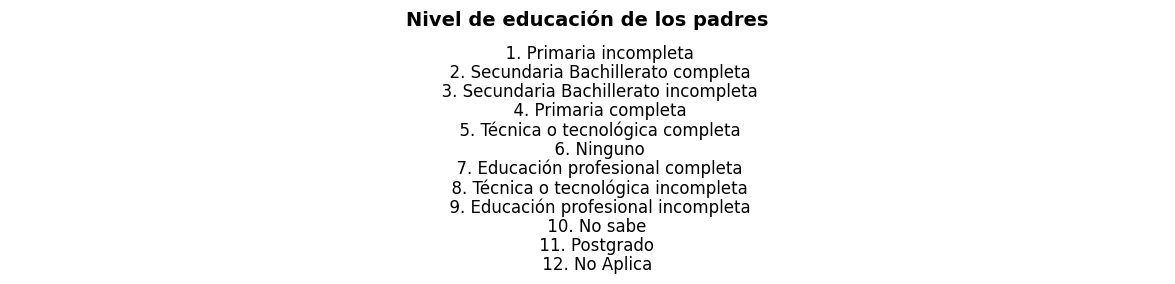

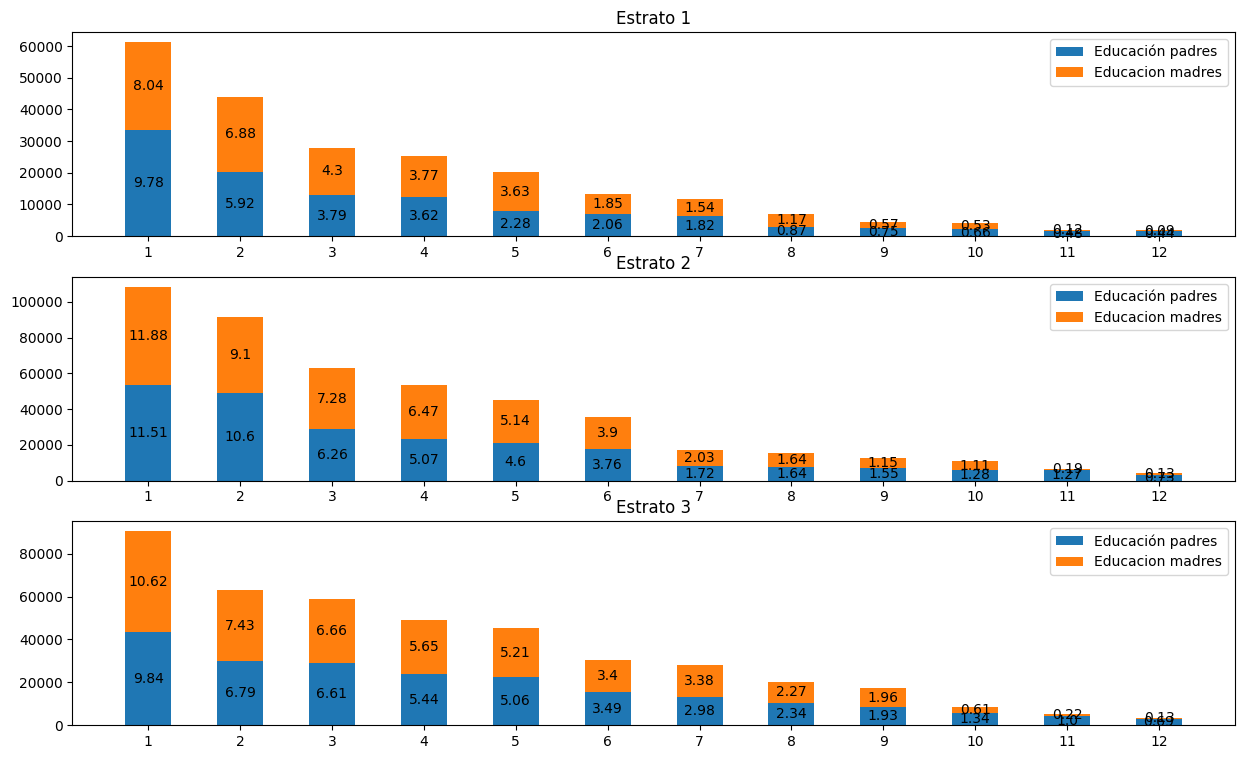

In [32]:
# Conteo por estratos 1 a 3 unicamente
n = new_d['FAMI_EDUCACIONPADRE'].nunique()
m = new_d['FAMI_EDUCACIONMADRE'].nunique()

if m == n:
  print('Mismas categorias de estudio en ambos padres \n')

educacion_padres = np.zeros((3, n))
educacion_madres = np.zeros((3, n))

for i in range(1, 4):

  educacion_padres[i-1,:] = new_d.loc[new_d['FAMI_ESTRATOVIVIENDA'] == 'Estrato '+str(i),
                        ['FAMI_EDUCACIONPADRE']].value_counts()

  educacion_madres[i-1,:] = new_d.loc[new_d['FAMI_ESTRATOVIVIENDA'] == 'Estrato '+str(i),
                        ['FAMI_EDUCACIONMADRE']].value_counts()

# Porcentajes
porcentajes_padres = np.ndarray((3,n))
porcentajes_madres = np.ndarray((3,n))

population = np.zeros(3)

for i in range(3):
  population[i] = np.sum(educacion_padres[i,:] + educacion_madres[1,:])

for i in range(3):
  porcentajes_padres[i,:] = np.round(100*educacion_padres[i,:]/population[i], 2)
  porcentajes_madres[i,:] = np.round(100*educacion_madres[i,:]/population[i], 2)

labels_dict = {}

for i in range(len(new_labels)):
  labels_dict[i+1] = new_labels[i]

# Plotting
fig1 = plt.figure(figsize=(15,3))

labels_fig = plt.subplot()
labels_fig.set_aspect('equal')
labels_fig.set_xlim(0,1500)
labels_fig.set_ylim(0, 300)
labels_fig.set_axis_off()
labels_fig.set_title('Nivel de educación de los padres',fontsize=14,fontweight='bold', fontname='sans-serif')

deltay= 25
y = 300
for number, label in labels_dict.items():
  y -= deltay
  center = (650, y)
  text = "%35s"%str(number)+'. '+label
  labels_fig.annotate(text, center, color='black', weight='normal',
                      fontsize=12, ha='center', va='center', fontname='sans-serif')


fig1.add_axes(labels_fig)

fig2 = plt.figure(figsize=(15,9))

for i in range(3):
    bottom = np.zeros(len(new_labels))
    ax = plt.subplot(3,1,i+1)
    p = ax.bar(labels_dict.keys(), educacion_padres[i,:], 0.50, label='Educación padres', bottom=bottom)
    bottom += educacion_padres[i,:]
    ax.bar_label(p, porcentajes_padres[i, :], label_type='center')
    p = ax.bar(labels_dict.keys(), educacion_madres[i,:], 0.50, label='Educacion madres', bottom=bottom)
    ax.set_title("Estrato "+str(i+1))
    ax.bar_label(p, porcentajes_madres[i, :], label_type='center')
    ax.legend(loc="upper right")
    ax.set_xticks(np.arange(1, 13, 1))

fig2.add_axes(ax)

plt.show()

Al graficar la distribución del nivel de educación de los padres se nota cierta igualdad de genero, es decir, son parejas conformadas con niveles similares de estudios, exceptuando en el caso de postgrados donde son mayoritariamente hombres. Los valores sobre cada barra corresponde al porcentaje que representa cada nivel educativo sobre toda la población por estratos. Las distribuciones son muy similares pero si se identifica que para los niveles tecnologicos y profesionales los porcentajes relativos se incrementan casi al doble.